In [19]:
import pandas as pd
SHAINING_PATH= "../output/shaining/gedi/data/BaselineED_shaining.csv"
df = pd.read_csv(SHAINING_PATH)
df

,log,rvpnot,rmcv,rt10v,enve,ense,enself,enseef,metric,method
0,BPIC13cp,-1.536121e-06,-0.000002,0.000006,1.134303e-06,-0.000066,-0.000616,0.000660,fitness,ilp
1,BPIC13inc,3.244895e-06,0.000009,0.000003,2.122194e-06,-0.000264,-0.001177,0.001414,fitness,ilp
2,BPIC13op,-9.893382e-07,0.000010,0.000001,9.422218e-07,0.000006,-0.000485,0.000475,fitness,ilp
3,BPIC16c_p,1.803193e-05,0.000024,-0.000020,1.652117e-05,-0.000853,-0.001250,0.001987,fitness,ilp
4,BPIC16wm_p,-9.002382e-06,0.000002,-0.000002,-5.477923e-05,0.000590,0.000920,-0.001445,fitness,ilp
...,...,...,...,...,...,...,...,...,...,...
205,BPIC20e,1.257701e+01,-8.521343,4.226180,1.128284e-02,-7.363411,57.725181,-57.975650,cfc,heu
206,HD,9.180690e+00,-13.840472,3.600175,9.628194e-02,-2.080477,41.410896,-31.741907,cfc,heu
207,RTFMP,1.363904e+01,-4.388074,5.600429,6.975572e-02,-13.629297,92.831629,-94.802046,cfc,heu
208,RWABOCSL,6.238756e+00,-12.540808,3.155214,-1.524128e-03,-3.586388,55.360292,-43.794918,cfc,heu


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shaining_heat(df, method='ilp', metric='fscore'):
    df = df[df['method']==method]
    df = df[df['metric']==metric]
    df = df.round(2)
    #print(df.shape, df)
    ax = sns.heatmap(df.drop(['log','metric','method'], axis=1).fillna(0), annot=True, cmap="viridis", annot_kws={"size": 14}, vmin=-1, vmax=1, cbar=True)
    ax.set_yticklabels(df['log'], rotation=0)
    output_path = f"../output/plots/shainingHeat_{metric}_{method}_BaselineED.png"
    print(output_path)
    plt.savefig(output_path, dpi=300, transparent=True)
    plt.clf()
plot_shaining_heat(df)

../output/plots/shainingHeat_fscore_ilp_BaselineED.png


<Figure size 640x480 with 0 Axes>

In [ ]:
methods = df['method'].unique()
metrics = df['metric'].unique()

for method in methods:
    for metric in metrics: 
        plot_shaining_heat(df, method=method, metric=metric)

In [65]:
SHAINING_PATH= "../output/shaining/gedi/data/GenED_shaining.csv"
gen_df = pd.read_csv(SHAINING_PATH)
gen_df = gen_df[gen_df['log'].str.contains("ense_")]

TypeError: 'MultiIndex' object is not callable

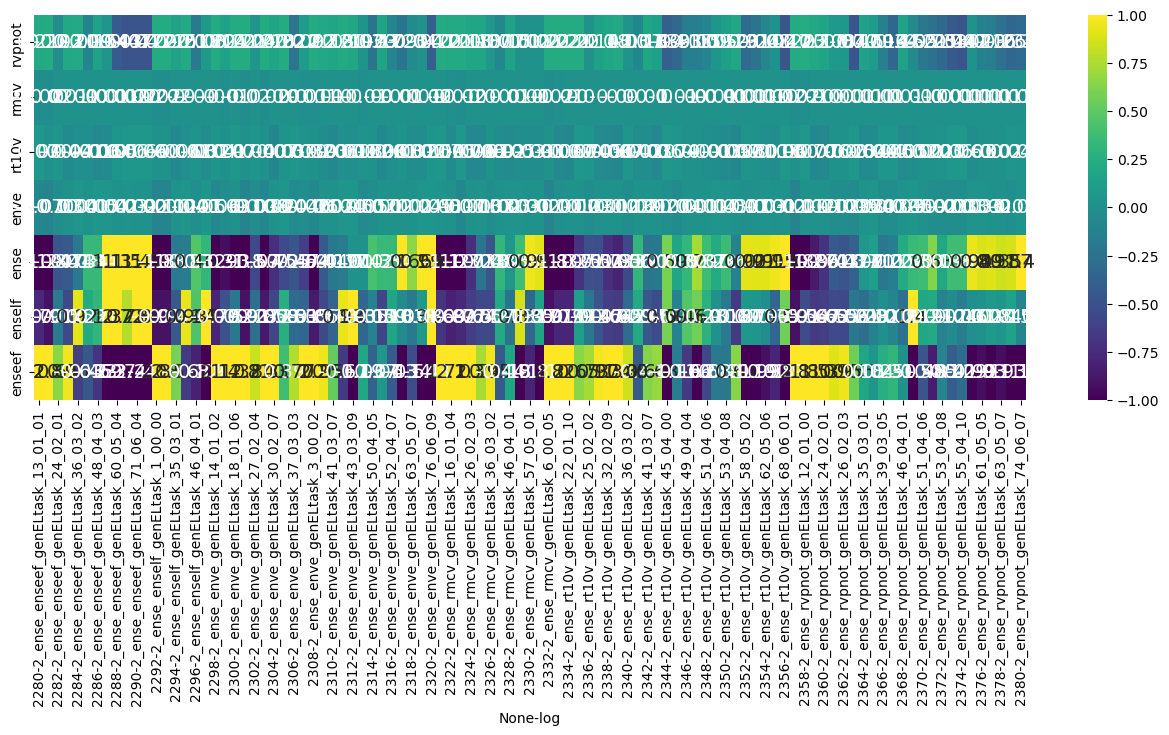

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shaining_heat(df, method='ilp', metric='fscore'):
    plt.subplots(figsize=(16,5))
    #df = df[df['log'].str.contains("ense_enseef")]
    df = df[df['method']==method]
    df = df[df['metric']==metric]
    df = df.round(2)
    df = df.set_index(['log'], append=True)
    
    #print(df.shape, df)
    ax = sns.heatmap(df.drop(['metric','method'], axis=1).transpose().fillna(0), annot=True, cmap="viridis", annot_kws={"size": 14}, vmin=-1, vmax=1, cbar=True)
    ax.set_yticklabels(df.drop(['metric','method'], axis=1).columns, rotation=90)
    ax.set_xticklabels(df.index, rotation=180)
    output_path = f"../output/plots/shainingHeat_{metric}_{method}_GenED.png"
    print(output_path)
    plt.savefig(output_path, dpi=300, transparent=True)
    plt.clf()
plot_shaining_heat(gen_df)